In [1]:
results = {'DemocraticPeriodicBracketTax.TaxIndexBracket_000': {'mean': [1.479, 1.503, 1.552, 1.45, 1.462, 1.46, 1.47, 1.453, 1.431], 'std': [1.1178367501563007, 1.1322504139985994, 1.09512373730095, 1.1124297730643495, 1.1129043085548729, 1.1155267813907472, 1.1256553646654024, 1.0880215990503128, 1.094184170969403]}, 'DemocraticPeriodicBracketTax.TaxIndexBracket_4000': {'mean': [1.506, 1.578, 1.55, 1.531, 1.516, 1.531, 1.541, 1.479, 1.473], 'std': [1.1471547410877052, 1.1339823631785462, 1.137321414552632, 1.1300615027510672, 1.1152327111414908, 1.121177506017669, 1.1154904750825978, 1.1142526643450308, 1.0914536178876315]}}

In [2]:
# Convenience functions    
def clean_ax_box(fig, keep_bottom_ticks=True):
    for ax in fig.get_axes():
        for sk, spine in ax.spines.items():
            spine.set_visible(sk in ['left', 'bottom'])
        ax.tick_params(top=False, bottom=keep_bottom_ticks)
        
def set_figure_tick_sizes(fig, x=None, y=None):
    for ax in fig.get_axes():
        if x is not None:
            for label in ax.get_xticklabels():
                label.set_fontsize(float(x))
        if y is not None:
            for label in ax.get_yticklabels():
                label.set_fontsize(float(y))
                
def set_figure_label_sizes(fig, x=None, y=None, t=None):
    for ax in fig.get_axes():
        if x is not None:
            ax.xaxis.label.set_fontsize(float(x))
        if y is not None:
            ax.yaxis.label.set_fontsize(float(y))
        if t is not None:
            ax.title.set_fontsize(float(t))
            
def clean_figure(fig=None):
    if fig is None:
        fig = plt.gcf()
        
    clean_ax_box(fig)
    set_figure_label_sizes(fig, x=14, y=14, t=14)
    set_figure_tick_sizes(fig, x=10, y=14)

In [15]:
def simple_plot(
    avgs, stes, steps,
    xlabel=None, ylabel=None, title=None, color=[  0, 0, 0],
    ax=None
):
    
    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(8, 4))
        
              
    ax.fill_between(steps, avgs-stes, avgs+stes, alpha=0.2, color=np.array(color)/255)
    ax.plot(steps, avgs, linewidth=1, color=np.array(color)/255)
    
    ax.set_ylim(bottom=0, top=3)
        
    ax.set_xticklabels([]);
    
    if xlabel is not None:
        ax.set_xlabel(xlabel, fontsize=14)
    
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=14)    

    if title is not None:
        ax.set_title(title, fontsize=14)

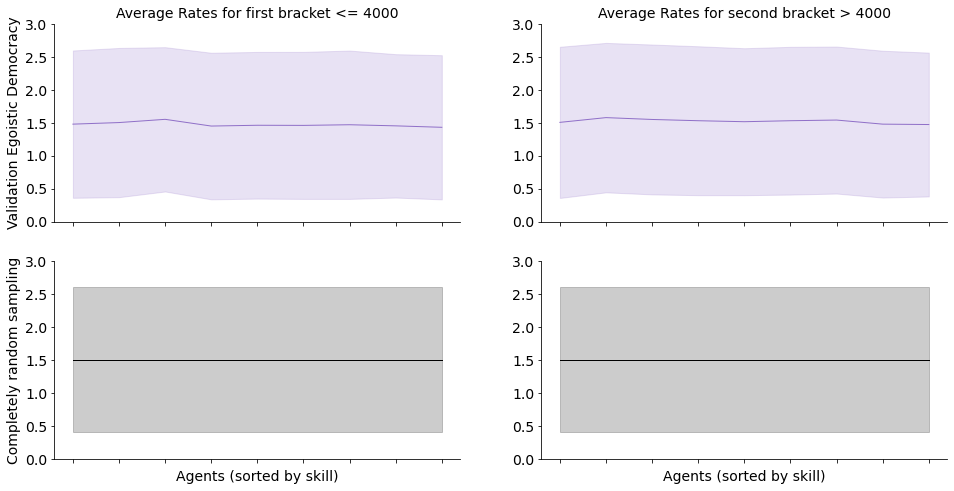

In [21]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
import numpy as np

# display(results)

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

simple_plot(
    avgs=np.array(results['DemocraticPeriodicBracketTax.TaxIndexBracket_000']['mean']),
    stes=np.array(results['DemocraticPeriodicBracketTax.TaxIndexBracket_000']['std']),
    steps=[i for i in range(9)],
    ax=axes[0,0],
    title="Average Rates for first bracket <= 4000",
    ylabel="Validation Egoistic Democracy",
    color=[  144, 112, 200],
)


simple_plot(
    avgs=np.array([1.5 for _ in range(9)]),
    stes=np.array([1.1 for _ in range(9)]),
    steps=[i for i in range(9)],
    ax=axes[1,0],
    xlabel="Agents (sorted by skill)",
    ylabel="Completely random sampling",
)

simple_plot(
    avgs=np.array(results['DemocraticPeriodicBracketTax.TaxIndexBracket_4000']['mean']),
    stes=np.array(results['DemocraticPeriodicBracketTax.TaxIndexBracket_4000']['std']),
    steps=[i for i in range(9)],
    ax=axes[0,1],
    title="Average Rates for second bracket > 4000",
    color=[  144, 112, 200],
)


simple_plot(
    avgs=np.array([1.5 for _ in range(9)]),
    stes=np.array([1.1 for _ in range(9)]),
    steps=[i for i in range(9)],
    ax=axes[1,1],
    xlabel="Agents (sorted by skill)",
)

clean_figure(fig)

In [18]:
# Shutdown Ray after use
ray.shutdown()